In [ ]:
##v1.0 노션 리뷰 최초 1페이지만 스크레이핑 하는 코드

# import requests
# import pandas as pd

# # 요청 URL 및 파라미터
# url = "https://api.reviewinsight.co.kr/api/software/191/reviews?id=191&page=1&limit=10"


# # API 요청
# response = requests.get(url)
# if response.status_code == 200:
#     data = response.json()
#     items = data.get("data", {}).get("items", [])



#     # 데이터프레임으로 변환
#     reviews = []
#     for item in items:
#         review = {
#             "Review ID": item.get("id"),
#             "Company Name": item.get("basicInfo", {}).get("companyName"),
#             "Rating": item.get("rating"),
#             "Comment": item.get("comment"),
#             "Pros": item.get("pros"),
#             "Cons": item.get("cons"),
#         }

#         # 상세 리뷰 답변 추가
#         answers = item.get("answers", [])
#         for answer in answers:
#             feature = answer.get("feature")
#             score = answer.get("score")
#             review[f"reviewQuestion_{feature}"] = answer.get("reviewQuestion")  # 열 이름 동적 생성
#             review[f"Feature: {feature}"] = score


#         reviews.append(review)

#     # 데이터프레임 생성
#     df = pd.DataFrame(reviews)

#     # 데이터프레임 출력
#     print("스크레이핑한 데이터:")
#     print(df)

#     # 데이터 저장
#     df.to_csv("reviews.csv", index=False, encoding="utf-8-sig")
#     print("데이터가 reviews.csv로 저장되었습니다.")
# else:
#     print(f"API 요청 실패: {response.status_code}")


In [ ]:
##v1.1 노션에 대해서 모든 페이지 스크레이핑 하는 코드

# import requests
# import pandas as pd

# # 요청 URL 및 파라미터
# base_url = "https://api.reviewinsight.co.kr/api/software/191/reviews"
# params = {
#     "id": 191,
#     "page": 1,  # 초기 페이지
#     "limit": 10  # 한 페이지당 데이터 수
# }

# # 데이터를 저장할 리스트 초기화
# all_reviews = []

# # 데이터가 없을 때까지 반복
# while True:
#     # API 요청
#     response = requests.get(base_url, params=params)
#     if response.status_code == 200:
#         data = response.json()
#         items = data.get("data", {}).get("items", [])

#         # 데이터가 없으면 반복 종료
#         if not items:
#             print("마지막 페이지에 도달했습니다.")
#             break

#         # 페이지 데이터 처리
#         for item in items:
#             review = {
#                 "SaaS": item.get("softwareName"),
#                 "Review ID": item.get("id"),
#                 "Company Name": item.get("basicInfo", {}).get("companyName"),
#                 "Rating": item.get("rating"),
#                 "Comment": item.get("comment"),
#                 "Pros": item.get("pros"),
#                 "Cons": item.get("cons"),
#             }

#             # 상세 리뷰 답변 추가
#             answers = item.get("answers", [])
#             for answer in answers:
#                 feature = answer.get("feature")
#                 score = answer.get("score")
#                 review[f"reviewQuestion_{feature}"] = answer.get("reviewQuestion")  # 열 이름 동적 생성
#                 review[f"Feature: {feature}"] = score

#             # 리뷰 리스트에 추가
#             all_reviews.append(review)

#         # 다음 페이지로 이동
#         params["page"] += 1
#     else:
#         print(f"API 요청 실패: {response.status_code}")
#         break

# # 데이터프레임 생성
# df = pd.DataFrame(all_reviews)

# # 데이터프레임 출력
# print("스크레이핑한 데이터:")
# print(df)

# # 데이터 저장
# df.to_csv("reviews.csv", index=False, encoding="utf-8-sig")
# print("데이터가 reviews.csv로 저장되었습니다.")


In [ ]:
##v.2.0 경쟁사까지 데이터 스크레이핑 하는 코드

# import requests
# import pandas as pd

# # SaaS ID 리스트
# ids = [191, 200, 358, 213, 193, 201, 207, 206, 215]

# # 데이터를 저장할 리스트 초기화
# all_reviews = []

# # 각 ID에 대해 반복
# for saas_id in ids:
#     print(f"Scraping data for ID: {saas_id}")
#     base_url = f"https://api.reviewinsight.co.kr/api/software/{saas_id}/reviews"
#     params = {
#         "id": saas_id,
#         "page": 1,  # 초기 페이지
#         "limit": 10  # 한 페이지당 데이터 수
#     }

#     # 데이터가 없을 때까지 반복
#     while True:
#         # API 요청
#         response = requests.get(base_url, params=params)
#         if response.status_code == 200:
#             data = response.json()
#             items = data.get("data", {}).get("items", [])

#             # 데이터가 없으면 반복 종료
#             if not items:
#                 print(f"Last page reached for ID: {saas_id}")
#                 break

#             # 페이지 데이터 처리
#             for item in items:
#                 review = {
#                     "SaaS ID": saas_id,
#                     "SaaS": item.get("softwareName"),
#                     "Review ID": item.get("id"),
#                     "Company Name": item.get("basicInfo", {}).get("companyName"),
#                     "Rating": item.get("rating"),
#                     "Comment": item.get("comment"),
#                     "Pros": item.get("pros"),
#                     "Cons": item.get("cons"),
#                 }

#                 # 상세 리뷰 답변 추가
#                 answers = item.get("answers", [])
#                 for answer in answers:
#                     feature = answer.get("feature")
#                     score = answer.get("score")
#                     review[f"reviewQuestion_{feature}"] = answer.get("reviewQuestion")  # 열 이름 동적 생성
#                     review[f"Feature: {feature}"] = score

#                 # 리뷰 리스트에 추가
#                 all_reviews.append(review)

#             # 다음 페이지로 이동
#             params["page"] += 1
#         else:
#             print(f"API 요청 실패: {response.status_code} for ID: {saas_id}")
#             break

# # 데이터프레임 생성
# df = pd.DataFrame(all_reviews)

# # 데이터프레임 출력
# print("스크레이핑한 데이터:")
# print(df)

# # 데이터 저장
# df.to_csv("all_reviews.csv", index=False, encoding="utf-8-sig")
# print("데이터가 all_reviews.csv로 저장되었습니다.")


In [ ]:
#v3.0 리뷰어의 소속 산업, 직무, 회사 인원수, 리뷰 날짜도 추가 스크레이핑

import requests
import pandas as pd
from datetime import datetime


# JSON 매핑 데이터를 사전으로 정의
mapping_data = {
    "INDUSTRY_CODE_1": "농림수산",
    "INDUSTRY_CODE_2": "광업",
    "INDUSTRY_CODE_3": "소비재 제조/판매",
    "INDUSTRY_CODE_4": "화학",
    "INDUSTRY_CODE_5": "제약/바이오",
    "INDUSTRY_CODE_6": "금속/비금속",
    "INDUSTRY_CODE_7": "전자/통신 제조",
    "INDUSTRY_CODE_8": "기계/장비",
    "INDUSTRY_CODE_9": "전기 장비/제품",
    "INDUSTRY_CODE_A": "자동차/조선/철도/항공",
    "INDUSTRY_CODE_B": "가구/귀금속/취미용품/기타",
    "INDUSTRY_CODE_C": "전력/연료",
    "INDUSTRY_CODE_D": "상하수/환경",
    "INDUSTRY_CODE_E": "건설",
    "INDUSTRY_CODE_F": "유통/판매",
    "INDUSTRY_CODE_G": "여객/운송/물류",
    "INDUSTRY_CODE_H": "미디어",
    "INDUSTRY_CODE_I": "IT통신",
    "INDUSTRY_CODE_J": "금융",
    "INDUSTRY_CODE_K": "부동산",
    "INDUSTRY_CODE_L": "연구/조사",
    "INDUSTRY_CODE_M": "자문",
    "INDUSTRY_CODE_N": "광고",
    "INDUSTRY_CODE_O": "설계/엔지니어링",
    "INDUSTRY_CODE_P": "전문서비스",
    "INDUSTRY_CODE_Q": "기관/단체",
    "INDUSTRY_CODE_R": "생활/여가서비스",
    "INDUSTRY_CODE_S": "지주회사/본부",
    "JOB_CODE_1": "경영/관리",
    "JOB_CODE_2": "전문직",
    "JOB_CODE_3": "의료 전문직",
    "JOB_CODE_4": "금융 전문직",
    "JOB_CODE_5": "교육 전문직",
    "JOB_CODE_6": "영업",
    "JOB_CODE_7": "마케팅/PR",
    "JOB_CODE_8": "IT/인터넷",
    "JOB_CODE_9": "연구개발/설계",
    "JOB_CODE_A": "디자인",
    "JOB_CODE_B": "건설",
    "JOB_CODE_C": "생산/제조",
    "JOB_CODE_D": "유통/무역",
    "JOB_CODE_E": "공무원/정치인",
    "JOB_CODE_F": "방송/언론",
    "JOB_CODE_G": "조사/분석",
    "JOB_CODE_H": "기타전문직",
    "JOB_CODE_I": "생활/서비스",
    "USING_COUNT_1": "1~30명이내",
    "USING_COUNT_2": "30~100명 이내",
    "USING_COUNT_3": "100~300명 이내",
    "USING_COUNT_4": "300~1000명 이내",
    "USING_COUNT_5": "1000명 이상",
}

# SaaS ID 리스트
ids = [191, 200, 358, 213, 193, 201, 207, 206, 215]

# 데이터를 저장할 리스트 초기화
all_reviews = []

# 각 ID에 대해 반복
for saas_id in ids:
    print(f"Scraping data for ID: {saas_id}")
    base_url = f"https://api.reviewinsight.co.kr/api/software/{saas_id}/reviews"
    params = {
        "id": saas_id,
        "page": 1,  # 초기 페이지
        "limit": 10  # 한 페이지당 데이터 수
    }

    # 데이터가 없을 때까지 반복
    while True:
        # API 요청
        response = requests.get(base_url, params=params)
        if response.status_code == 200:
            data = response.json()
            items = data.get("data", {}).get("items", [])

            # 데이터가 없으면 반복 종료
            if not items:
                print(f"Last page reached for ID: {saas_id}")
                break

            # 페이지 데이터 처리
            for item in items:
                basic_info = item.get("basicInfo", {})
                # 날짜 변환 처리
                created_at = item.get("createdAt")
                review_date = datetime.strptime(created_at, "%Y-%m-%dT%H:%M:%S.%fZ").date() if created_at else None

                review = {
                    "SaaS ID": saas_id,
                    "SaaS": item.get("softwareName"),
                    "Review Date": review_date,  # 가공된 날짜 추가
                    "Review ID": item.get("id"),
                    "Company Name": basic_info.get("companyName"), # 리뷰어 회사명
                    "Industry": mapping_data.get(basic_info.get("industry"), basic_info.get("industry")), # 리뷰어 산업군
                    "Job": mapping_data.get(basic_info.get("job"), basic_info.get("job")), # 리뷰어 직무
                    "Using Count": mapping_data.get(basic_info.get("usingCountCode"), basic_info.get("usingCountCode")), # 리뷰어 회사 인원수
                    "Rating": item.get("rating"),
                    "Comment": item.get("comment"),
                    "Pros": item.get("pros"),
                    "Cons": item.get("cons"),
                }

                # 상세 리뷰 답변 추가
                answers = item.get("answers", [])
                for answer in answers:
                    feature = answer.get("feature")
                    score = answer.get("score")
                    review[f"reviewQuestion_{feature}"] = answer.get("reviewQuestion")  # 열 이름 동적 생성
                    review[f"Feature: {feature}"] = score

                # 리뷰 리스트에 추가
                all_reviews.append(review)

            # 다음 페이지로 이동
            params["page"] += 1
        else:
            print(f"API 요청 실패: {response.status_code} for ID: {saas_id}")
            break

# 데이터프레임 생성
df = pd.DataFrame(all_reviews)

# 데이터프레임 출력
print("스크레이핑한 데이터:")
print(df)

# 데이터 저장
df.to_csv("all_reviews_with_mapping.csv", index=False, encoding="utf-8-sig")
print("데이터가 all_reviews_with_mapping.csv로 저장되었습니다.")


Scraping data for ID: 191
Last page reached for ID: 191
Scraping data for ID: 200
Last page reached for ID: 200
Scraping data for ID: 358
Last page reached for ID: 358
Scraping data for ID: 213
Last page reached for ID: 213
Scraping data for ID: 193
Last page reached for ID: 193
Scraping data for ID: 201
Last page reached for ID: 201
Scraping data for ID: 207
Last page reached for ID: 207
Scraping data for ID: 206
Last page reached for ID: 206
Scraping data for ID: 215
Last page reached for ID: 215
스크레이핑한 데이터:
     SaaS ID SaaS Review Date  Review ID Company Name      Industry     Job  \
0        191   노션  2024-12-05       4971           쏘카  자동차/조선/철도/항공  IT/인터넷   
1        191   노션  2024-12-05       4969           유원            건설     디자인   
2        191   노션  2024-12-05       4963           개인          IT통신  IT/인터넷   
3        191   노션  2024-12-04       4962          비투엔          IT통신  마케팅/PR   
4        191   노션  2024-12-04       4943     인디비정보시스템          IT통신  IT/인터넷   
..       .

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SaaS ID                  436 non-null    int64  
 1   SaaS                     436 non-null    object 
 2   Review Date              436 non-null    object 
 3   Review ID                436 non-null    int64  
 4   Company Name             341 non-null    object 
 5   Industry                 436 non-null    object 
 6   Job                      436 non-null    object 
 7   Using Count              436 non-null    object 
 8   Rating                   436 non-null    float64
 9   Comment                  181 non-null    object 
 10  Pros                     436 non-null    object 
 11  Cons                     307 non-null    object 
 12  reviewQuestion_기능 만족도    436 non-null    object 
 13  Feature: 기능 만족도          436 non-null    float64
 14  reviewQuestion_사용 난이도    4

In [ ]:
df[
    ['reviewQuestion_기능 만족도',
    'reviewQuestion_사용 난이도',
    'reviewQuestion_고객지원 서비스',
    'reviewQuestion_타제품과 연동성',
    'reviewQuestion_보안 기능'
    ]
    ].head(1)

,reviewQuestion_기능 만족도,reviewQuestion_사용 난이도,reviewQuestion_고객지원 서비스,reviewQuestion_타제품과 연동성,reviewQuestion_보안 기능
0,해당 소프트웨어 도입 시 필요로 했던 기능들 전반을 잘 사용 중이며 만족한다.,UI/UX가 직관적이고 이해하기 쉽게 구성되어 있어 사용하기 쉽다.,"오류 발생 시 고객지원팀의 지원이 빠르고 효율적이며, 지속적인 업데이트를 제공하여 ...",특정 시스템 또는 소프트웨어 간에 상호작용(데이터 교환 및 연동 등)이 용이하다.,권한이 있는 사람(또는 시스템)과 권한이 없는 사람(또는 시스템)을 구별하여 정보에...


# COMMENT
* 총 436건의 리뷰 데이터
* 정량적인 평점 데이터는 결측치가 없음
* 리뷰어 정보 중에 Company Name은 결측치가 25%정도 있으나,
Industry > Job > Using Count는 결측치가 없어서 활용 가능
스크린샷 2025-01-15 195448.png
* 다만, **Using Count의 정의가 무엇인지 확인이 필요함**
회사직원 규모일수도 있지만, 본인 회사에서 해당 SaaS의 사용자수일 수도 있을거 같단 생각이 듬


* **Rating의 정의도 확인이 필요함**
1) 응답자가 별도로 직접 답변하는 값인지,  OR
2) 세부 항목 5개를 바탕으로 계산되는지 확인 필요

2)라면 다중공선성으로 인해 Rating이란 값이 크게 의미 없어질 것이라 판단되기 때문.

* Comment, Pros, Cons와 같은 텍스트 응답은 Pros를 제외하고는 모두 **결측치가 있음. 분석할 때 이부분 유의**해야함.
특히, **'없음' 같은 응답 데이터는 NULL로 전처리 해야할 것**



# 테크뷰 회원가입해서 리뷰 작성해보며 확인한 내용
* Using Count : 리뷰어가 회원가입할 때 입력하는 "사용자수". 즉 회사 직원 수
(회사명, 산업분야, 직무, 사용자수)
* Rating : 리뷰 시작 할 때, 리뷰어가 총평을 별점 5점 만점 (0.5점씩 줄 수 있음)으로 직접 입력
* 기능만족도 : 7점 척도로 평가하게 되고, 추후 10점으로 환산되어 코딩되는 값
매우나쁨 - 나쁨 - 조금나쁨 - 보통 - 조금만족 - 만족 - 매우만족

In [ ]:
df.describe()

,SaaS ID,Review ID,Rating,Feature: 기능 만족도,Feature: 사용 난이도,Feature: 고객지원 서비스,Feature: 타제품과 연동성,Feature: 보안 기능
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,221.344037,2356.848624,8.100229,8.557798,8.411468,7.331193,8.024541,7.673394
std,51.452565,1097.253321,1.116717,1.687468,1.657101,1.746021,1.753399,1.699473
min,191.000000,1473.000000,0.000000,1.400000,2.900000,2.900000,1.000000,3.000000
25%,200.000000,1665.750000,7.500000,8.000000,7.000000,6.000000,7.000000,6.000000
50%,206.000000,1815.500000,8.100000,9.000000,9.000000,7.000000,8.000000,8.000000
75%,213.000000,3339.250000,8.800000,10.000000,10.000000,8.600000,10.000000,9.000000
max,358.000000,5003.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


* 평점은 10점 만점
* Rating에 0점을 준 응답자도 있는데, 각 기능별 만족도는 0점이 없음 -> **이상치**로 의심됨
* 평균이 모두 7점 이상, 25% 구간도 6점 이상임. 전반적으로 평점이 후한 것으로 판단됨
* 평점이 좋은 데이터보다는, 안좋은 데이터 쪽에 집중해서 분석을 하면 인사이트를 도출 할 수 있을 수도 있지 않을까 생각이 됨.

In [ ]:
# prompt: rating = 0 인 row만 표시해줘

df_rating_0 = df[df['Rating'] == 0]
df_rating_0

,SaaS ID,SaaS,Review Date,Review ID,Company Name,Industry,Job,Using Count,Rating,Comment,...,reviewQuestion_기능 만족도,Feature: 기능 만족도,reviewQuestion_사용 난이도,Feature: 사용 난이도,reviewQuestion_고객지원 서비스,Feature: 고객지원 서비스,reviewQuestion_타제품과 연동성,Feature: 타제품과 연동성,reviewQuestion_보안 기능,Feature: 보안 기능
3,191,노션,2024-12-04,4962,비투엔,IT통신,마케팅/PR,100~300명 이내,0.0,첫 사용 시 어려움이 많음,...,해당 소프트웨어 도입 시 필요로 했던 기능들 전반을 잘 사용 중이며 만족한다.,5.7,UI/UX가 직관적이고 이해하기 쉽게 구성되어 있어 사용하기 쉽다.,4.3,"오류 발생 시 고객지원팀의 지원이 빠르고 효율적이며, 지속적인 업데이트를 제공하여 ...",7.1,특정 시스템 또는 소프트웨어 간에 상호작용(데이터 교환 및 연동 등)이 용이하다.,5.7,권한이 있는 사람(또는 시스템)과 권한이 없는 사람(또는 시스템)을 구별하여 정보에...,7.1


Raing = 0 인 데이터는 노션에서 1개의 리뷰 뿐임

In [ ]:
# Group the DataFrame by 'SaaS'
grouped = df.groupby('SaaS')

# Iterate through each SaaS group and perform descriptive statistics
for saas, group_df in grouped:
    print(f"\nDescriptive Statistics for {saas}:\n")
    print(group_df.describe())  # Include all data types for description



Descriptive Statistics for JANDI:

       SaaS ID    Review ID     Rating  Feature: 기능 만족도  Feature: 사용 난이도  \
count     48.0    48.000000  48.000000        48.000000        48.000000   
mean     206.0  2046.250000   8.072917         8.535417         8.666667   
std        0.0   767.796335   0.822228         1.348047         1.548277   
min      206.0  1767.000000   6.500000         6.000000         5.000000   
25%      206.0  1778.750000   7.375000         7.775000         8.000000   
50%      206.0  1790.500000   8.000000         9.000000         9.000000   
75%      206.0  1802.250000   8.725000        10.000000        10.000000   
max      206.0  4609.000000  10.000000        10.000000        10.000000   

       Feature: 고객지원 서비스  Feature: 타제품과 연동성  Feature: 보안 기능  
count          48.000000          48.000000       48.000000  
mean            7.368750           7.922917        7.858333  
std             1.856805           1.818140        1.832082  
min             4.000000       

In [ ]:
# prompt: koreanized matplotlib 설치

!pip install matplotlib
!pip install koreanize-matplotlib


In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import numpy as np

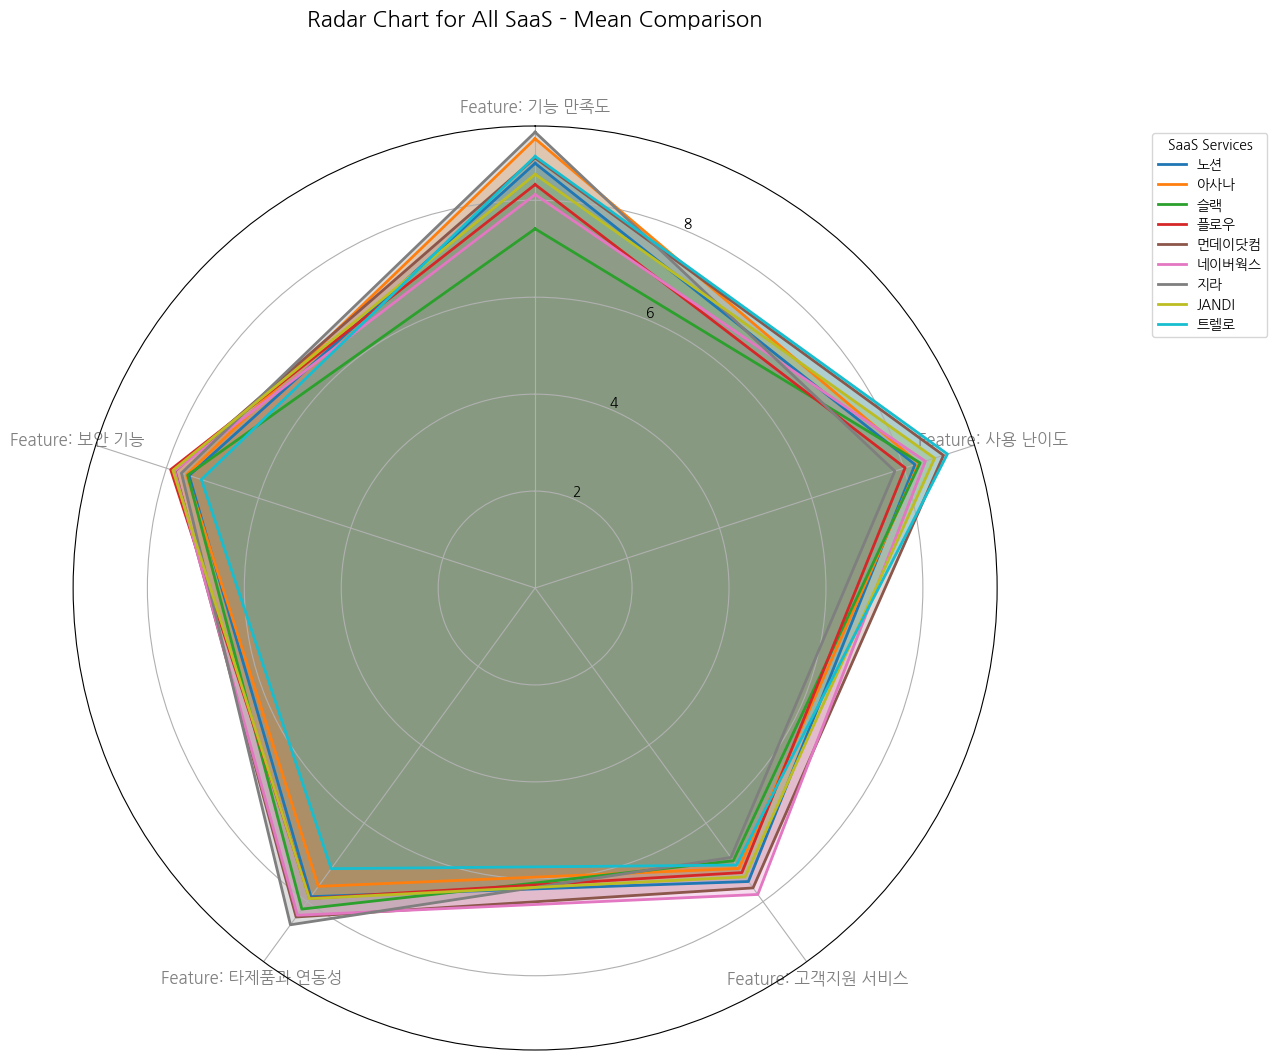

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 분석할 Feature 항목
features = ['Feature: 기능 만족도', 'Feature: 사용 난이도', 'Feature: 고객지원 서비스', 'Feature: 타제품과 연동성', 'Feature: 보안 기능']

# SaaS 항목별 분석
saas_list = df['SaaS'].unique()

# 방사형 그래프 생성
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# 각 Feature의 각도 설정
angles = [n / float(len(features)) * 2 * np.pi for n in range(len(features))]
angles += angles[:1]

# 축 라벨 설정
plt.xticks(angles[:-1], features, color='grey', size=12)

# 컬러 팔레트
colors = plt.cm.tab10(np.linspace(0, 1, len(saas_list)))

# SaaS별 데이터 추가
for i, saas in enumerate(saas_list):
    saas_df = df[df['SaaS'] == saas]
    stats_values = []
    for feature in features:
        if feature in saas_df.columns:
            stat_value = saas_df[feature].mean()  # 평균값 사용
            stats_values.append(stat_value)
        else:
            stats_values.append(0)
    stats_values += stats_values[:1]  # 첫 번째 값 추가해 닫기

    # 라인과 면적 추가
    ax.plot(angles, stats_values, linewidth=2, linestyle='solid', label=saas, color=colors[i])
    ax.fill(angles, stats_values, alpha=0.25, color=colors[i])

# 그래프 제목 및 범례 설정
plt.title("Radar Chart for All SaaS - Mean Comparison", size=16, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), fontsize=10, title="SaaS Services")
plt.show()


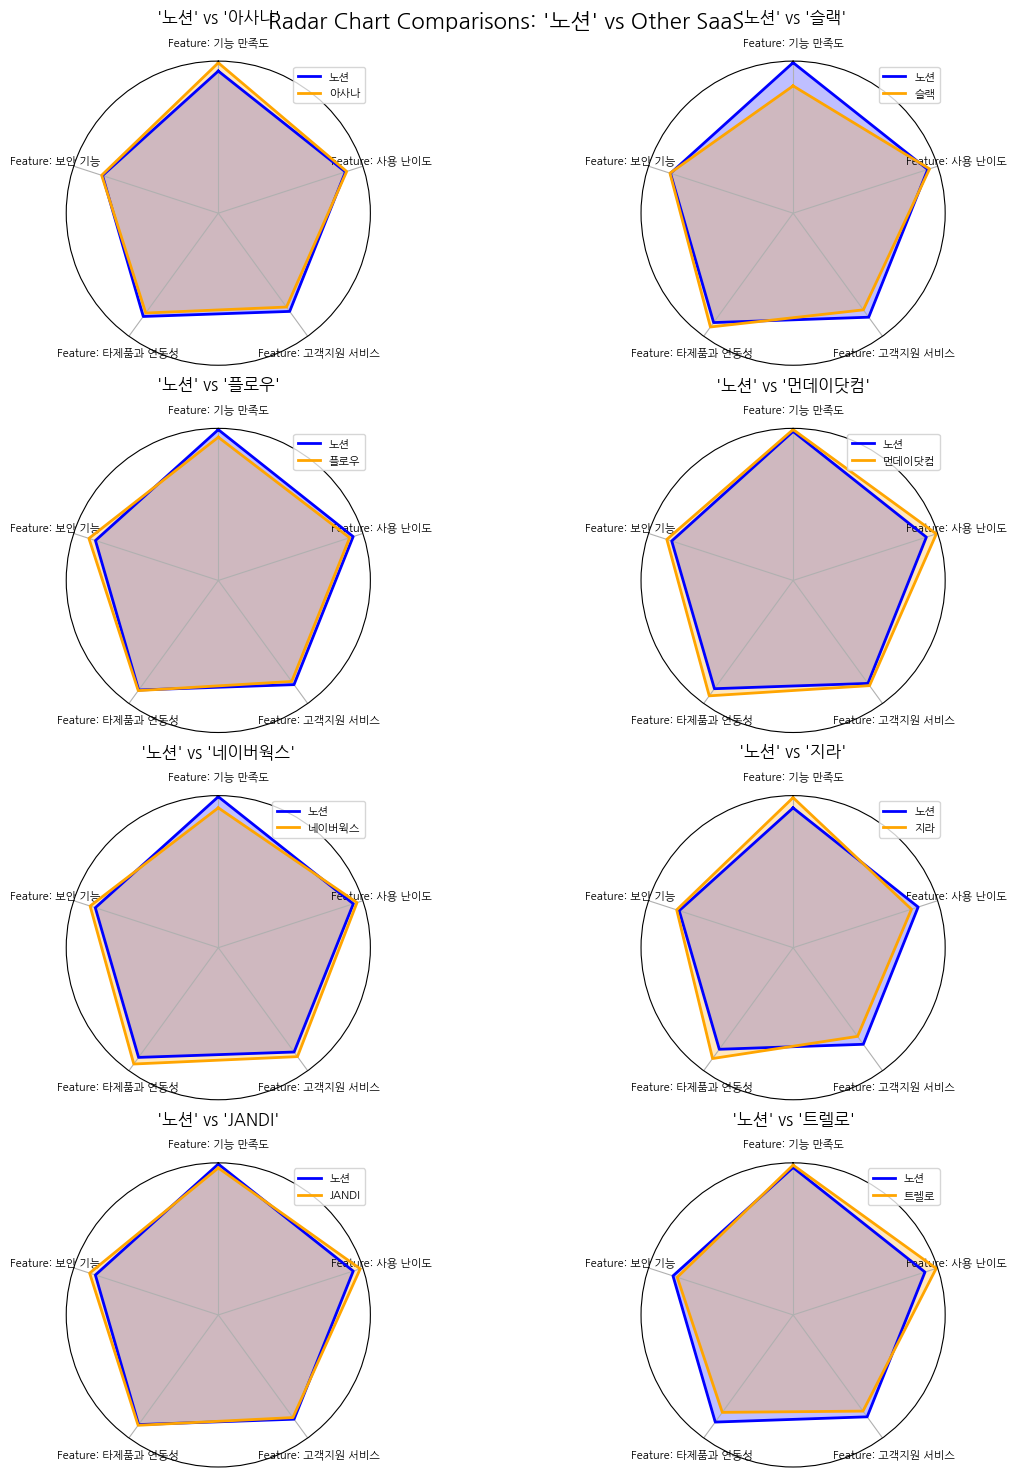

In [ ]:
# '노션'과 다른 SaaS 서비스 각각을 비교하는 방사형 그래프 생성
notion = "노션"
comparison_saas_list = [saas for saas in saas_list if saas != notion]

# 그래프 크기 설정 (4x2 레이아웃)
fig, axes = plt.subplots(4, 2, figsize=(12, 16), subplot_kw=dict(polar=True))
fig.suptitle("Radar Chart Comparisons: '노션' vs Other SaaS", size=16, y=0.92)

# 각 비교 SaaS와 '노션'에 대한 방사형 그래프 생성
for idx, saas in enumerate(comparison_saas_list):
    row, col = divmod(idx, 2)
    ax = axes[row, col]

    # '노션' 데이터
    notion_data = df[df['SaaS'] == notion]
    notion_values = [notion_data[feature].mean() if feature in notion_data.columns else 0 for feature in features]
    notion_values += notion_values[:1]  # 그래프 닫기

    # 비교 SaaS 데이터
    saas_data = df[df['SaaS'] == saas]
    saas_values = [saas_data[feature].mean() if feature in saas_data.columns else 0 for feature in features]
    saas_values += saas_values[:1]  # 그래프 닫기

    # 각도 설정
    angles = [n / float(len(features)) * 2 * np.pi for n in range(len(features))]
    angles += angles[:1]

    # 방사형 그래프 추가
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.plot(angles, notion_values, linewidth=2, linestyle='solid', label='노션', color='blue')
    ax.fill(angles, notion_values, alpha=0.25, color='blue')
    ax.plot(angles, saas_values, linewidth=2, linestyle='solid', label=saas, color='orange')
    ax.fill(angles, saas_values, alpha=0.25, color='orange')

    # 축 및 레이블 설정
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, size=8)
    ax.set_yticks([])  # 내부 원 값 제거
    ax.set_title(f"'노션' vs '{saas}'", size=12, y=1.1)
    ax.legend(loc='upper right', fontsize=8)

# 레이아웃 조정 및 그래프 표시
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
# unique for all columns
for col in df.columns:
  print(f"Unique values for {col}: {df[col].unique()}")

Unique values for SaaS ID: [191 200 358 213 193 201 207 206 215]
Unique values for SaaS: ['노션' '아사나' '슬랙' '플로우' '먼데이닷컴' '네이버웍스' '지라' 'JANDI' '트렐로']
Unique values for Review Date: [datetime.date(2024, 12, 5) datetime.date(2024, 12, 4)
 datetime.date(2024, 9, 3) datetime.date(2024, 3, 20)
 datetime.date(2024, 3, 16) datetime.date(2024, 1, 12)
 datetime.date(2023, 10, 20) datetime.date(2023, 5, 15)
 datetime.date(2023, 5, 9) datetime.date(2023, 2, 21)
 datetime.date(2023, 2, 19) datetime.date(2023, 2, 11)
 datetime.date(2023, 1, 31) datetime.date(2023, 1, 22)
 datetime.date(2023, 1, 21) datetime.date(2023, 1, 18)
 datetime.date(2023, 1, 10) datetime.date(2023, 1, 8)
 datetime.date(2023, 1, 1) datetime.date(2022, 12, 26)
 datetime.date(2022, 12, 14) datetime.date(2022, 12, 4)
 datetime.date(2022, 11, 30) datetime.date(2022, 10, 27)
 datetime.date(2022, 10, 14) datetime.date(2022, 10, 6)
 datetime.date(2022, 9, 23) datetime.date(2022, 9, 20)
 datetime.date(2022, 9, 19) datetime.date(2022, 9

아래 부터는 당장 안쓰는 이전 코드

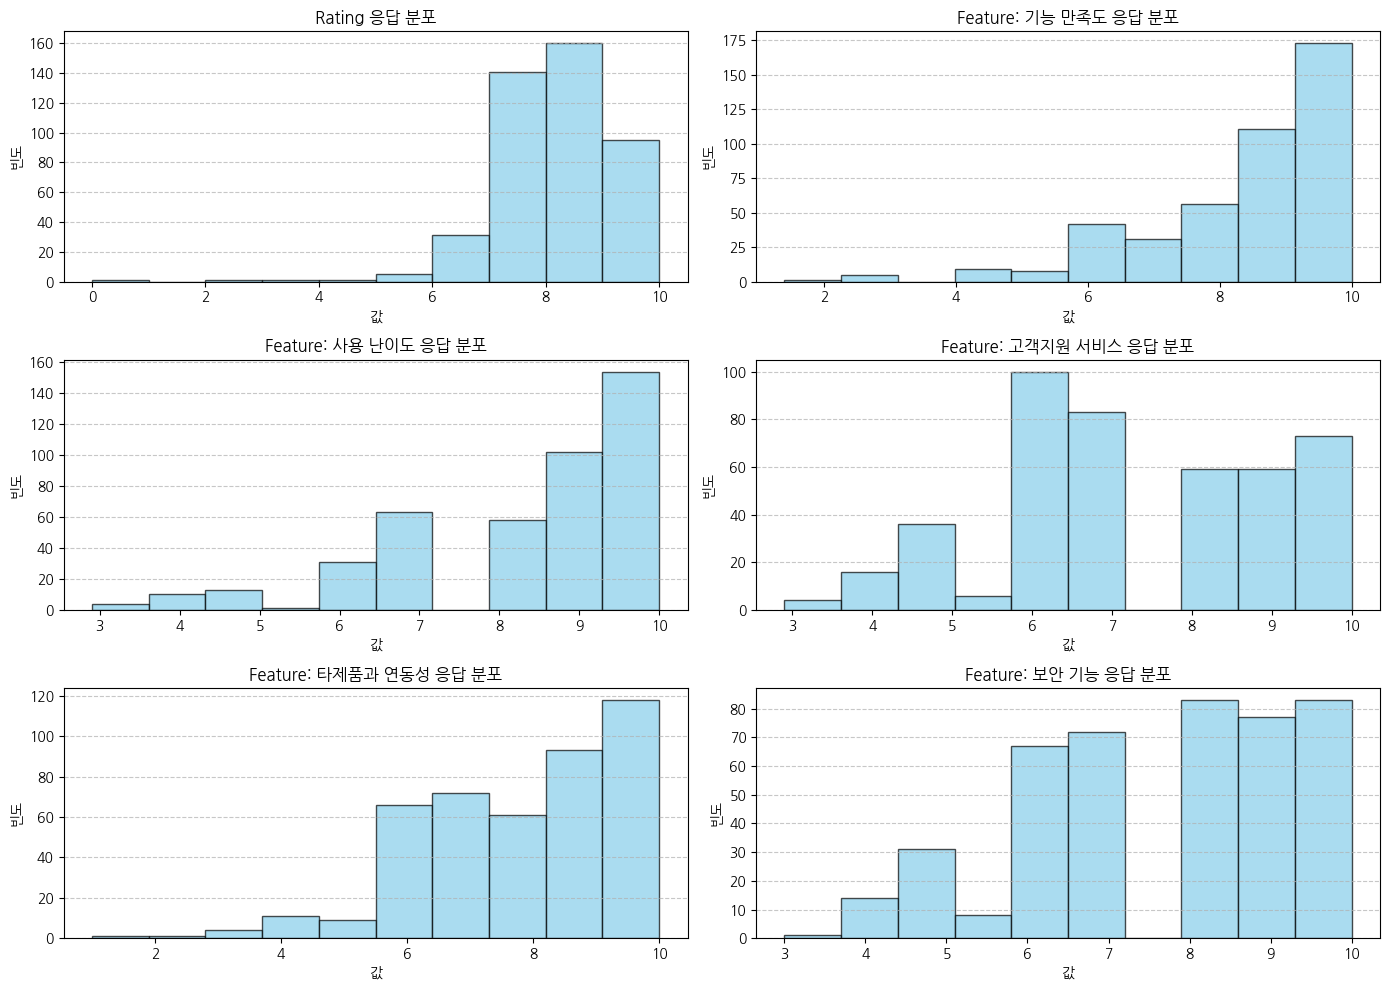

In [ ]:


# # 각 Feature별로 히스토그램 생성
# features = ["Rating", "Feature: 기능 만족도", "Feature: 사용 난이도",
#             "Feature: 고객지원 서비스", "Feature: 타제품과 연동성", "Feature: 보안 기능"]

# plt.figure(figsize=(14, 10))
# for i, feature in enumerate(features, 1):
#     plt.subplot(3, 2, i)  # 3x2 레이아웃에 i번째 그래프
#     plt.hist(df[feature], bins=10, color="skyblue", alpha=0.7, edgecolor="black")
#     plt.title(f"{feature} 응답 분포")
#     plt.xlabel("값")
#     plt.ylabel("빈도")
#     plt.grid(axis="y", linestyle="--", alpha=0.7)

# plt.tight_layout()
# plt.show()


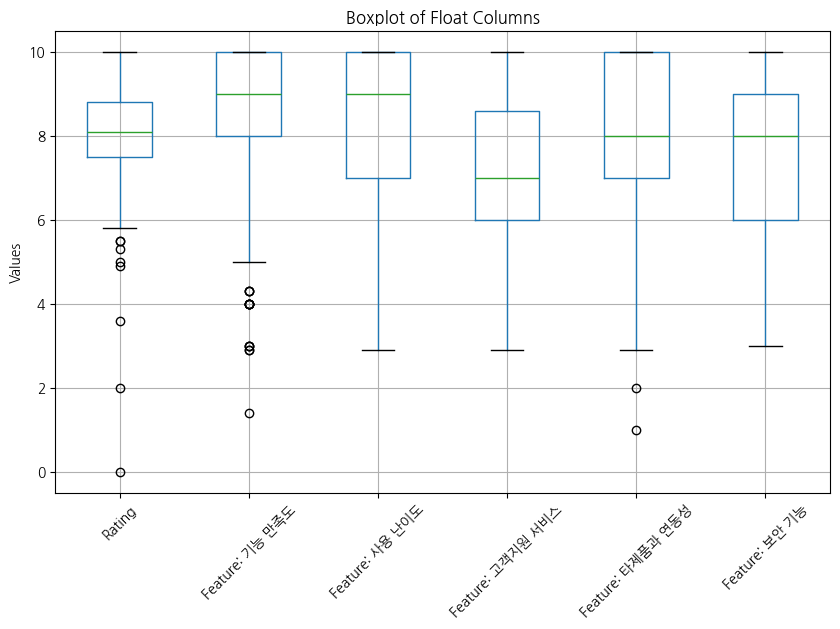

In [ ]:
# # 2) 박스플롯 (Boxplot)으로 데이터 분포 시각화
# plt.figure(figsize=(10, 6))
# df[features].boxplot()
# plt.title("Boxplot of Float Columns")
# plt.ylabel("Values")
# plt.xticks(rotation=45)
# plt.show()

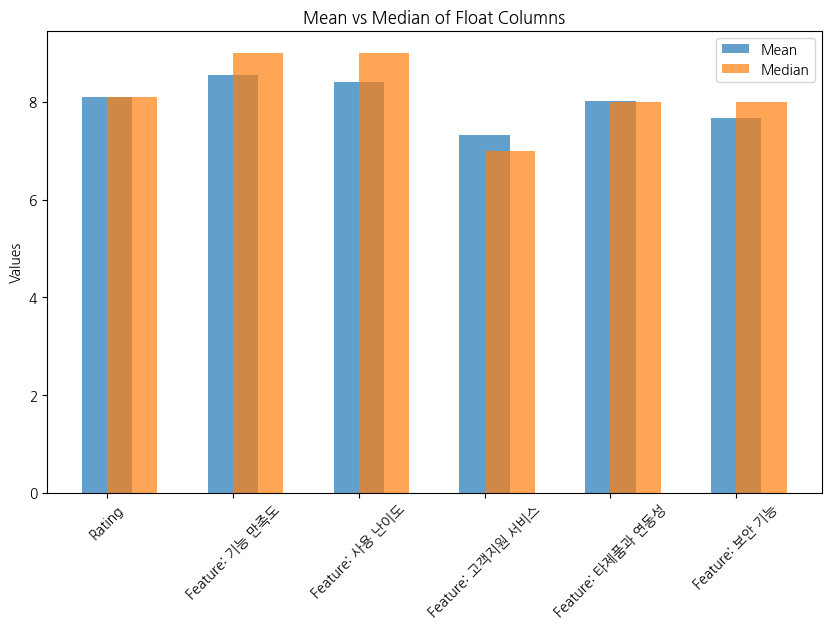

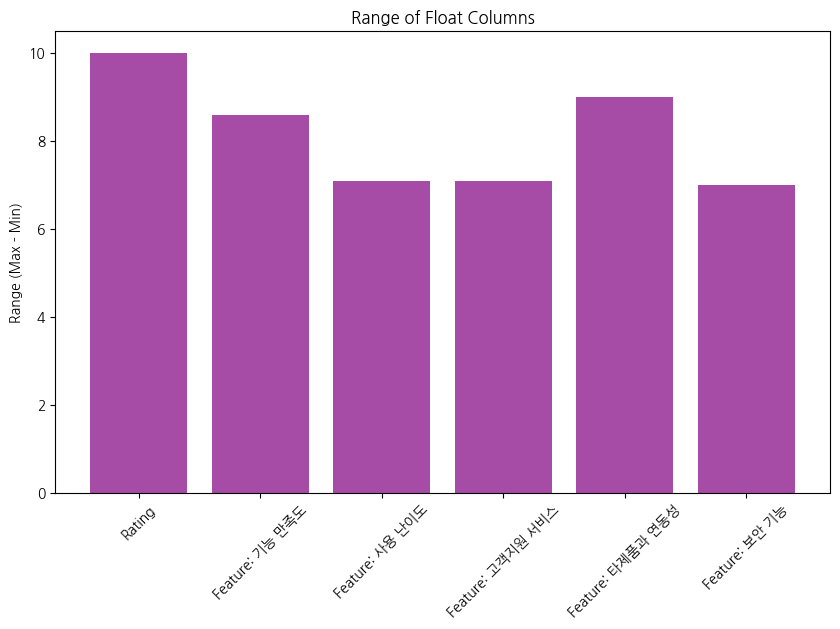

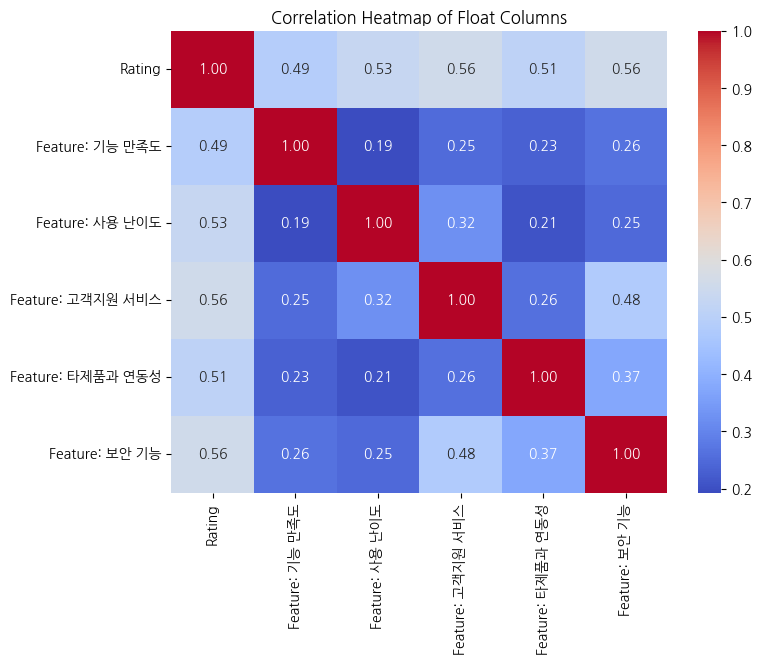

In [ ]:
# float_columns = features
# # 3) 각 컬럼의 평균과 중앙값 비교
# means = df[float_columns].mean()
# medians = df[float_columns].median()
# x_labels = float_columns

# plt.figure(figsize=(10, 6))
# plt.bar(x_labels, means, alpha=0.7, label="Mean", width=0.4, align='center')
# plt.bar(x_labels, medians, alpha=0.7, label="Median", width=0.4, align='edge')
# plt.title("Mean vs Median of Float Columns")
# plt.ylabel("Values")
# plt.xticks(rotation=45)
# plt.legend()
# plt.show()

# # 4) 각 컬럼의 범위 시각화
# range_values = df[float_columns].max() - df[float_columns].min()
# plt.figure(figsize=(10, 6))
# plt.bar(float_columns, range_values, color="purple", alpha=0.7)
# plt.title("Range of Float Columns")
# plt.ylabel("Range (Max - Min)")
# plt.xticks(rotation=45)
# plt.show()

# # 5) 컬럼 간의 상관 관계 히트맵
# import seaborn as sns

# plt.figure(figsize=(8, 6))
# sns.heatmap(df[float_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Heatmap of Float Columns")
# plt.show()